# Symbolic Regressor

In [54]:
%pylab inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

Populating the interactive namespace from numpy and matplotlib


Отрисуем функцию которую мы собираемся восстанавливать

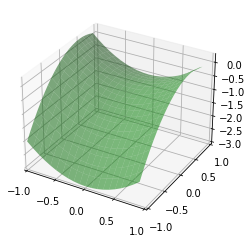

In [55]:
# Ground truth
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, .5))
ax.set_yticks(np.arange(-1, 1.01, .5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()

Генерируем обучающую и тестовую выборки

In [56]:
def train_test_generation(func, limit = [-1,1], n_samples =100):
    # Training samples
    X_train = rng.uniform(limit[0], limit[1], n_samples*2).reshape(n_samples, 2)
    y_train = func(X_train) 

    # Testing samples
    X_test = rng.uniform(limit[0], limit[1], n_samples*2).reshape(n_samples, 2)
    y_test = func(X_test) 
    
    return X_train, y_train, X_test, y_test

In [57]:
rng = check_random_state(0)

def selected_function(X):
    return X[:, 0]**2 - X[:, 1]**2 + X[:, 1] - 1

X_train, y_train, X_test, y_test = train_test_generation(selected_function)

**Запуск алгоритма генетического программирования**

В алгоритме имеется несколько типов мутации и всего один кроссовер. Типами муьаций мы можем управлять посредствам вероятностей их применения, прямое отключение или включение какого-то из типов не предусмотрено.

В качестве метртки по умолчанию задана "Mean absolute error", ее и оставим.

In [58]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13      1.74079e+07        5         0.348055         0.413693      1.48m
   1     9.70          1.65286        9         0.337629         0.469809     56.61s
   2     7.43          2.43089        7         0.248999         0.242558     48.88s
   3     5.18          2.09129       11         0.232146         0.302091     46.03s
   4     3.84          1.19891       11         0.234877         0.277511     38.60s
   5     4.86          2.39069       13         0.158496         0.158496     30.51s
   6     6.94          1.48963       13         0.158496         0.158496     18.58s
   7     7.61          2.13474       13         0.158496         0.158496     13.97s
   8     8.45          1.51878       13         0.158496         0.158496  

SymbolicRegressor(generations=10, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

**Посмотрим какая функция у нас получилась**

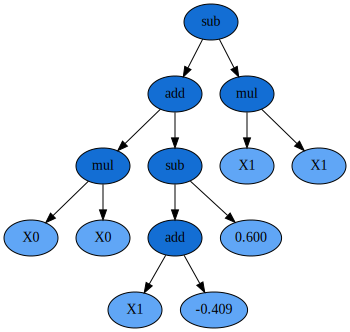

In [59]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph

**Ухудшим условия**

В качестве функционального множества по умолчанию определено: function_set=('add', 'sub', 'mul', 'div')
Поменяем его, оставим всего две функции, ипосмотрим хватит ли алгоритму чтобы что-то хорошее построить.

In [60]:
est_gp_2 = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('add', 'sub'))
est_gp_2.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    34.47          1.99225        3         0.334969         0.494908      1.46m
   1    10.01         0.971829       11         0.327796         0.532433     50.72s
   2     6.36         0.784397        3          0.32583         0.577157     46.42s
   3     3.65         0.596686        3           0.3198         0.694994     40.08s
   4     3.34         0.567797        3         0.316822          0.65343     33.97s
   5     3.35         0.561235        3         0.319502         0.629313     25.34s
   6     3.39          0.54597        3         0.319012         0.638523     20.38s
   7     3.34         0.542006        3          0.31988         0.625913     13.20s
   8     3.41         0.548776        3         0.314043         0.683239  

SymbolicRegressor(function_set=('add', 'sub'), generations=10, max_samples=0.9,
                  p_crossover=0.7, p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

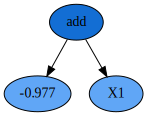

In [61]:
dot_data = est_gp_2._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph

Найденная функция оставляет желать лучшего! Чего и следовало ожидать, поскольку в моделируемой функции имеются операции умножения а мы дали алгоритму функциональное множество состоящее всего лишь из "+", и "-".

**Сравнение эффективности генетического алгоритма с алгоритмами RandomForest и DecisionTree из sklearn**

Инициализация алгоритмов с которыми будем сравнивать:

In [62]:
est_tree = DecisionTreeRegressor()
est_rf = RandomForestRegressor(n_estimators=10)

Теперь обучим модели на той же обучающей выборке, что использовали для GP:

In [63]:
est_tree.fit(X_train, y_train)
est_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [64]:
def compare_graphs(results, limit=[-1,1], h_between_ticks=.5, label_position = [-.6, 1, -.6]):
    position = label_position
    fig = plt.figure(figsize=(12, 10))

    for i, (y, score, title) in enumerate(results):

        ax = fig.add_subplot(2, 2, i+1, projection='3d')
        ax.set_xlim(limit[0], limit[1])
        ax.set_ylim(limit[0], limit[1])
        ax.set_xticks(np.arange(limit[0], limit[1]+0.01, h_between_ticks))
        ax.set_yticks(np.arange(limit[0], limit[1]+0.01, h_between_ticks))
        surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='green', alpha=0.5)
        points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
        if score is not None:
            score = ax.text(position[0], position[1], position[2], "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
        plt.title(title)

    plt.show()

Сравним результаты:

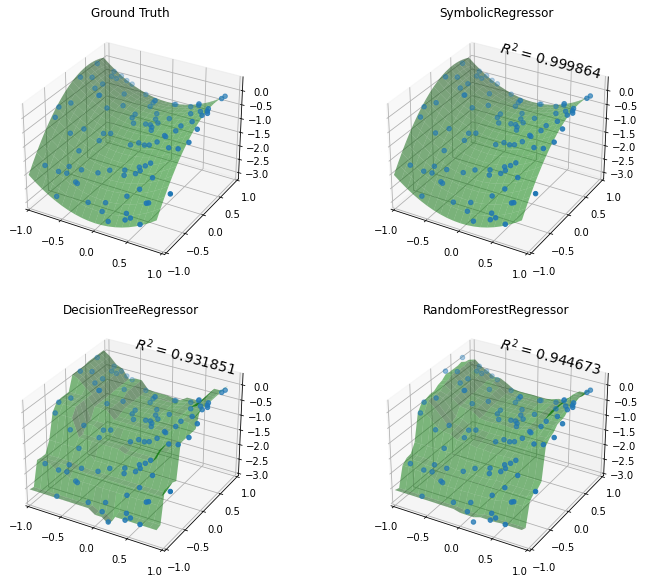

In [65]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_rf = est_rf.score(X_test, y_test)

results = [(y_truth, None, "Ground Truth"),
           (y_gp, score_gp, "SymbolicRegressor"),                            
           (y_tree, score_tree, "DecisionTreeRegressor"),
           (y_rf, score_rf, "RandomForestRegressor")]


compare_graphs(results)

Попробуем воостановить более сложную функцию 

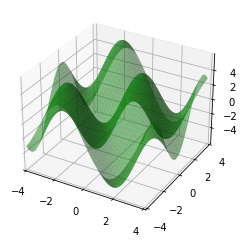

In [66]:
# Ground truth
limit = [-4, 4]
x0 = np.arange(limit[0], limit[1], .1)
x1 = np.arange(limit[0], limit[1], .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = 6*sin(x0)*cos(x1)

ax = plt.figure().gca(projection='3d')
ax.set_xlim(limit[0], limit[1])
ax.set_ylim(limit[0], limit[1])
ax.set_xticks(np.arange(limit[0], limit[1]+0.01, 2))
ax.set_yticks(np.arange(limit[0], limit[1]+0.01, 2))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()

In [67]:
rng = check_random_state(0)

def selected_function(X):
    return 6*sin(X[:, 0])*cos(X[:, 1])

In [68]:
X_train, y_train, X_test, y_test = train_test_generation(selected_function, limit=limit, n_samples=500)

Помимо этого добавим собственную функцию в функциональное множество в качестве примера:

In [69]:
from gplearn.functions import make_function

def pow_3(x1):
    f = x1**3
    return f

pow_3 = make_function(function=pow_3,name='pow3',arity=1)

Обновляем функциональное множество:

In [70]:
function_set = ['add', 'sub', 'mul', 'div', 'sin', 'cos', pow_3]

In [71]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=70, stopping_criteria=0.01,
                           p_crossover=0.35, p_subtree_mutation=0.3,
                           p_hoist_mutation=0.05, p_point_mutation=0.3,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0, function_set=function_set)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    16.41     1.36833e+140       10          2.16572          2.76084      9.09m
   1     6.15      8.70858e+18        5          2.07378          2.55642      8.40m
   2     6.34      1.57663e+36        9          1.70961          1.58988      7.84m
   3     5.19      4.86698e+18       14          1.53719          1.38332      7.33m
   4     6.48          31976.2        8         0.279904         0.318213      7.81m
   5     8.74      3.87884e+22        8         0.278405         0.331704      7.74m
   6    10.79      2.63206e+14        8         0.274496         0.366882      8.75m
   7    11.16          5048.44       15          0.10924         0.112977      9.74m
   8     8.78      9.06967e+11       16        0.0777147        0.0683541  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sin', 'cos',
                  generations=70, max_samples=0.9, p_crossover=0.35,
                  p_hoist_mutation=0.05, p_point_mutation=0.3,
                  p_subtree_mutation=0.3, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

Результирующее дерево:

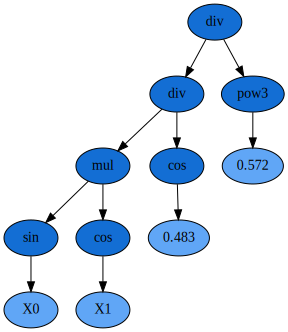

In [72]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph

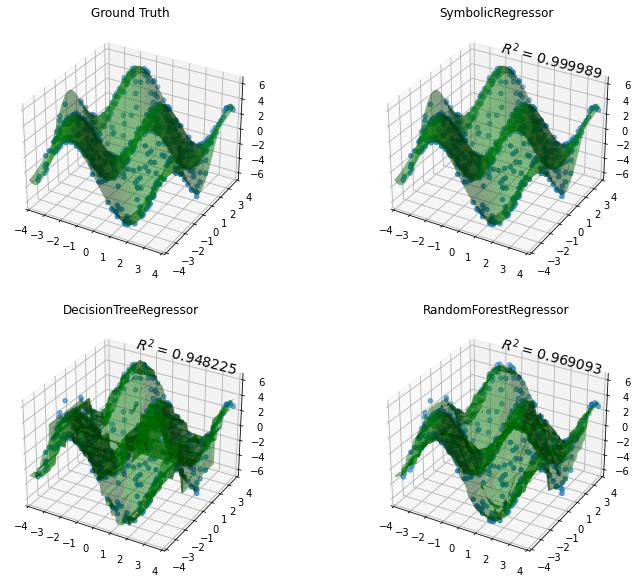

In [73]:
est_tree.fit(X_train, y_train)
est_rf.fit(X_train, y_train)
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_rf = est_rf.score(X_test, y_test)

results = [(y_truth, None, "Ground Truth"),
           (y_gp, score_gp, "SymbolicRegressor"),                            
           (y_tree, score_tree, "DecisionTreeRegressor"),
           (y_rf, score_rf, "RandomForestRegressor")]


compare_graphs(results, limit =limit, label_position = (-.6, 1, 7), h_between_ticks=1)

Попробуем ограничить функциональное множество

In [74]:
function_set = ['add', 'sub', 'mul', 'tan']

Заново запускаем алгоритм 

In [75]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=40, stopping_criteria=0.01,
                           p_crossover=0.35, p_subtree_mutation=0.3,
                           p_hoist_mutation=0.05, p_point_mutation=0.3,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0, function_set=function_set)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.37      4.20632e+07        8          2.48159          3.20016      5.40m
   1     8.40          1557.74       13          2.43959          2.91269      4.41m
   2     4.44          1766.03       13          2.43491          2.95477      4.10m
   3     3.51          98.7211        3          2.46418          3.28692      3.98m
   4     3.27      1.88581e+08        2          2.45163          3.39887      3.93m
   5     2.90          1079.75        2          2.45198          3.38537      4.08m
   6     2.72          223.525        1           2.4552          3.37163      3.28m
   7     2.43           500.93        1          2.45155          3.39155      2.68m
   8     2.46          749.793        1          2.44948          3.42314  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'tan'], generations=40,
                  max_samples=0.9, p_crossover=0.35, p_hoist_mutation=0.05,
                  p_point_mutation=0.3, p_subtree_mutation=0.3,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

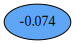

In [76]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph

# Symbolic Transformer

In [77]:
from gplearn.genetic import SymbolicTransformer
from sklearn.utils import check_random_state
from sklearn.datasets import load_boston
import numpy as np

Подгружаем данные и перемешаем их

In [78]:
rng = check_random_state(0)
boston = load_boston()
perm = rng.permutation(boston.target.size)
boston.data = boston.data[perm]
boston.target = boston.target[perm]

Применим Ридж-Регрессию для этого примера: 

In [79]:
from sklearn.linear_model import Ridge
est = Ridge()
est.fit(boston.data[:300, :], boston.target[:300])
print("Ridge score:", est.score(boston.data[300:, :], boston.target[300:]))

Ridge score: 0.7593194530498838


Теперь применим алгоритм из gplearn добавив в функциональное множество побольше функций.

In [80]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                'abs', 'neg', 'inv', 'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0)
gp.fit(boston.data[:300, :], boston.target[:300])

gp_features = gp.transform(boston.data)
new_boston = np.hstack((boston.data, gp_features))

est = Ridge()
est.fit(new_boston[:300, :], boston.target[:300])
print("GP score", est.score(new_boston[300:, :], boston.target[300:]))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.04         0.339876        6         0.822502         0.675124      1.16m
   1     6.91         0.593562        7         0.836993         0.602468      1.01m
   2     5.07         0.730093        8          0.84063         0.704017      1.04m
   3     5.22         0.735525        5         0.847019         0.628351     58.81s
   4     6.24         0.734679       10         0.856612         0.565138     57.56s
   5     8.23         0.721433       18          0.85677         0.728095     51.11s
   6    10.20         0.717937       14         0.875233         0.619693     52.24s
   7    11.84         0.720667       14         0.875927         0.609363     51.93s
   8    12.56         0.733019       27         0.881705         0.390121  

# Symbolic Classifier
Посмотреть самостоятельно:
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html